In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle
import sys
import csv
current_dir = %pwd

In [2]:
log_dir = current_dir + '/seaquest_crop'

In [3]:
def csv_to_dict_of_arrays(filename):
    with open(filename) as f:
        reader = csv.DictReader(f)
        l = list(reader)
        learning = dict.fromkeys(reader.fieldnames)
        # Figure out the types by checking the first row
        types = []
        for d, k in l[0].items():
            try:
                int(k)
                types.append(np.int)
            except ValueError:
                types.append(np.float)
        for i, k in enumerate(learning):
            learning[k] = np.empty(len(l), dtype=types[i])
        for i, row in enumerate(l):
            for k, v in row.items():
                learning[k][i] = v
        return learning

In [4]:
learning = csv_to_dict_of_arrays(log_dir + '/learning.csv')
results = csv_to_dict_of_arrays(log_dir + '/results.csv')
print 'learning:', learning.keys()
print 'results:', results.keys()

learning: ['epsilon', 'mean_loss']
results: ['reward_per_episode', 'epoch', 'total_reward', 'num_episodes', 'mean_q']


In [5]:
from scipy.signal import gaussian
from scipy.ndimage import filters

#gaussian filter (running average but closer points have higher weights)
def smoothing(x,window,axis=0):
    filt = gaussian(window,2.)
    return filters.convolve1d(x,filt/np.sum(filt),axis)

## Learning Progress

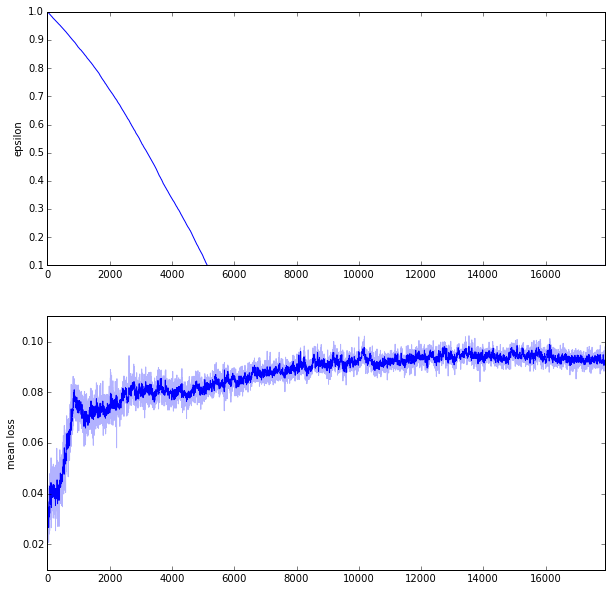

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ep = np.arange(learning['epsilon'].size)
ax1.plot(ep, learning['epsilon'], 'b-')
ax1.set_xlim(ep[0], ep[-1])
#ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('epsilon')

mean_loss_smoothed = smoothing(learning['mean_loss'], 10)
    
ax2.plot(ep, learning['mean_loss'], 'b-', alpha=0.3, markersize=1)
ax2.plot(ep, mean_loss_smoothed, 'b-')
ax2.set_ylabel('mean loss')
ax2.set_xlim(ep[0], ep[-1])
plt.show()

## Results

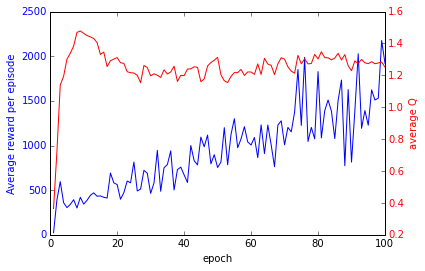

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(results['epoch'], results['reward_per_episode'], 'b-')
ax1.set_xlabel('epoch')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Average reward per episode', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(results['epoch'], results['mean_q'], 'r-')
ax2.set_ylabel('average Q', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()